In [5]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime/';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime/


In [13]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## List of Point

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
point_list(foldername=homedir)

,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_13,Point_14,Point_15,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,Point_25,Point_26,Point_27
0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,50.0,50.0,50.0,50.0,50.0,75.0,75.0,75.0,75.0,75.0,100.0,100.0,100.0,100.0


## Time trace plot

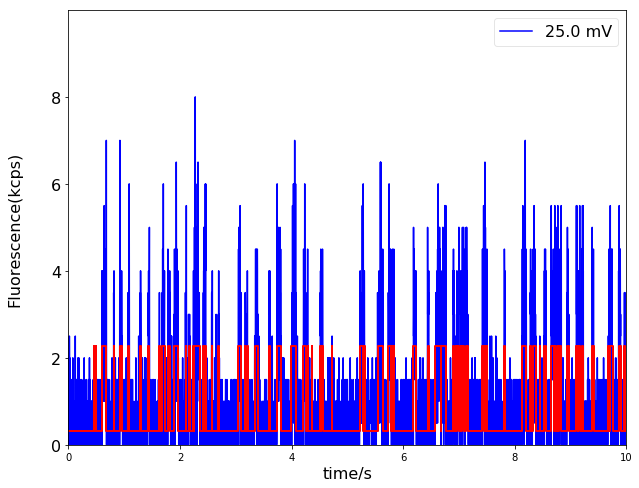

In [11]:
fig = time_trace_plot(foldername= homedir, input_potential=[25, 50, 100], pointnumbers=[4],
                      x_lim_min=0, y_lim_min=0, x_lim_max=10, y_lim_max=10, bin=2, show_changepoint=True)

## On_off histgram

### 100 mV

#### Point_24: 1200 sec

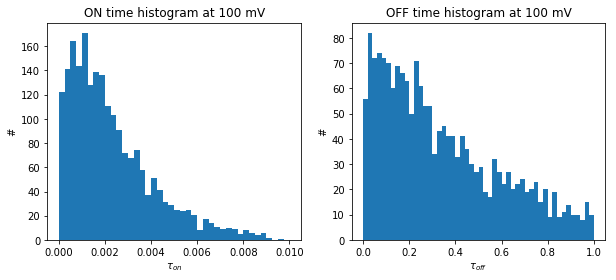

In [38]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[100], pointnumbers=[24], bins_on=40, range_on=[0, 0.01], bins_off=50, range_off=[0, 1], plotting=True)

### 75 mv

#### Point_20: 900 sec

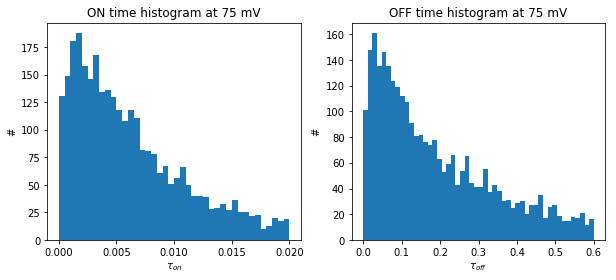

In [23]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[75], pointnumbers=[20], bins_on=40, range_on=[0, 0.02], bins_off=50, range_off=[0, 0.6], plotting=True)

#### point_22:900sec

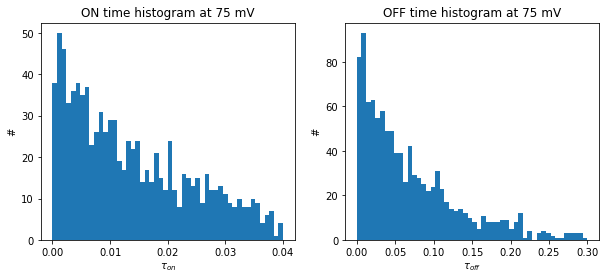

In [33]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[75], pointnumbers=[22], bins_on=50, range_on=[0, 0.04], bins_off=50, range_off=[0, 0.3], plotting=True)

### 50 mV

#### Point_16: 1920 sec

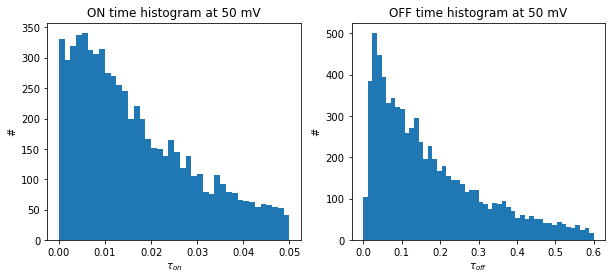

In [26]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[50], pointnumbers=[16], bins_on=40, range_on=[0, 0.05], bins_off=50, range_off=[0, 0.6], plotting=True)

### 25 mV

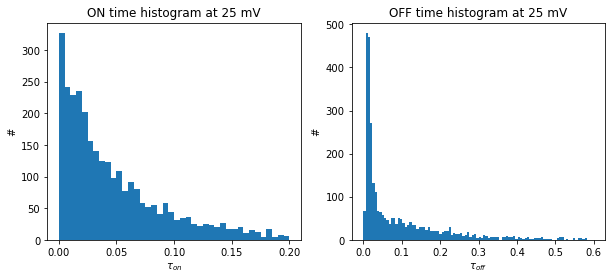

In [37]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[25], pointnumbers=[5], bins_on=40, range_on=[0, 0.2], bins_off=100, range_off=[0, 0.6], plotting=True)

## On-off histogram:all_point(folder)